# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: 

In [22]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd
import matplotlib.pyplot as plt

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [23]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [24]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

In [25]:
import matplotlib.pyplot as plt


### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [26]:
# Seleccionar las columnas de Año y Nacimientos
seleccion = ['Año', 'Nacimientos']
df[seleccion].head()


# OTRA FORMA DE HACERLO

df[['Año', 'Nacimientos']].head()


,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157


In [27]:
# Filtrar datos desde el año 2010
x = df['Año'] >= 2010
df[x]

,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [28]:
# total_nacimientos
total_nacimientos = df['Nacimientos'].sum()
print('Total Nacimientos:', total_nacimientos)
# total_defunciones 
total_defunciones = df['Defunciones'].sum()
print(f'Total Defunciones: {total_defunciones:,}')

Total Nacimientos: 4846207
Total Defunciones: 975,501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [29]:
#Saldo Poblacional
df['Saldo Poblacional'] = df['Nacimientos'] - df['Defunciones']
df.head()

,Año,Nacimientos,Defunciones,Saldo Poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

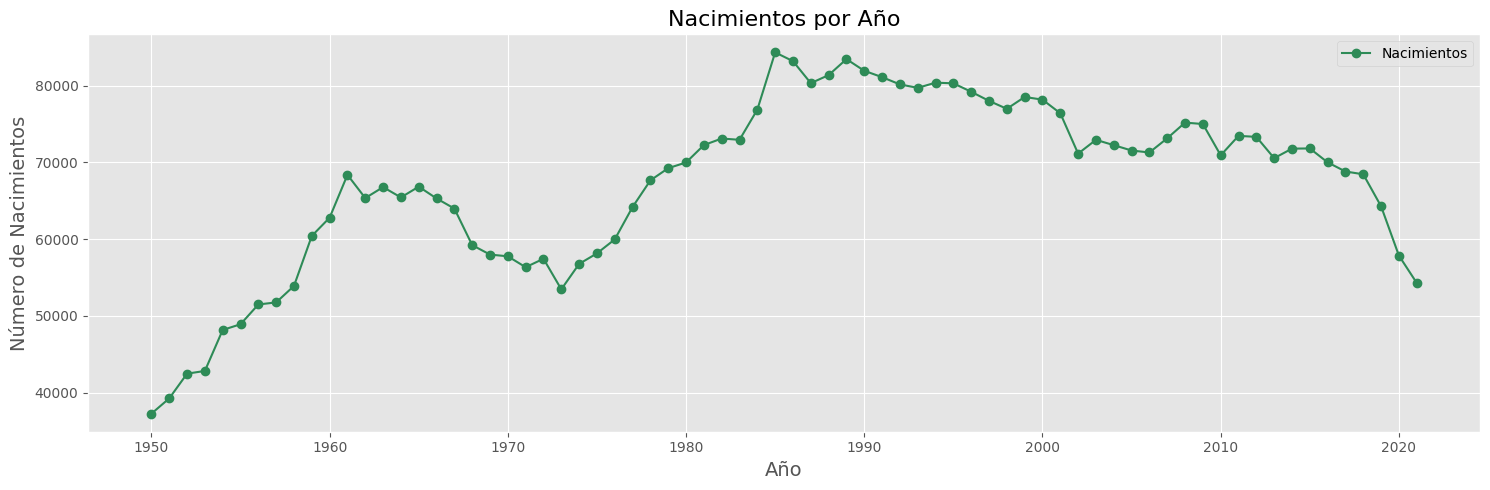

In [53]:
# Configuración de estilo para las gráficas
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 5) # Define el tamaño por defecto de las figuras: 8x4 pulgadas

fig, ax = plt.subplots()
anios = df['Año']
nacimientos = df['Nacimientos']

ax.plot(anios, nacimientos, marker='o', color='seagreen', label='Nacimientos')

ax.set_title('Nacimientos por Año', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Número de Nacimientos', fontsize=14)
ax.legend()
plt.tight_layout()

### **Gráfico de barras: Comparación de nacimientos y defunciones**

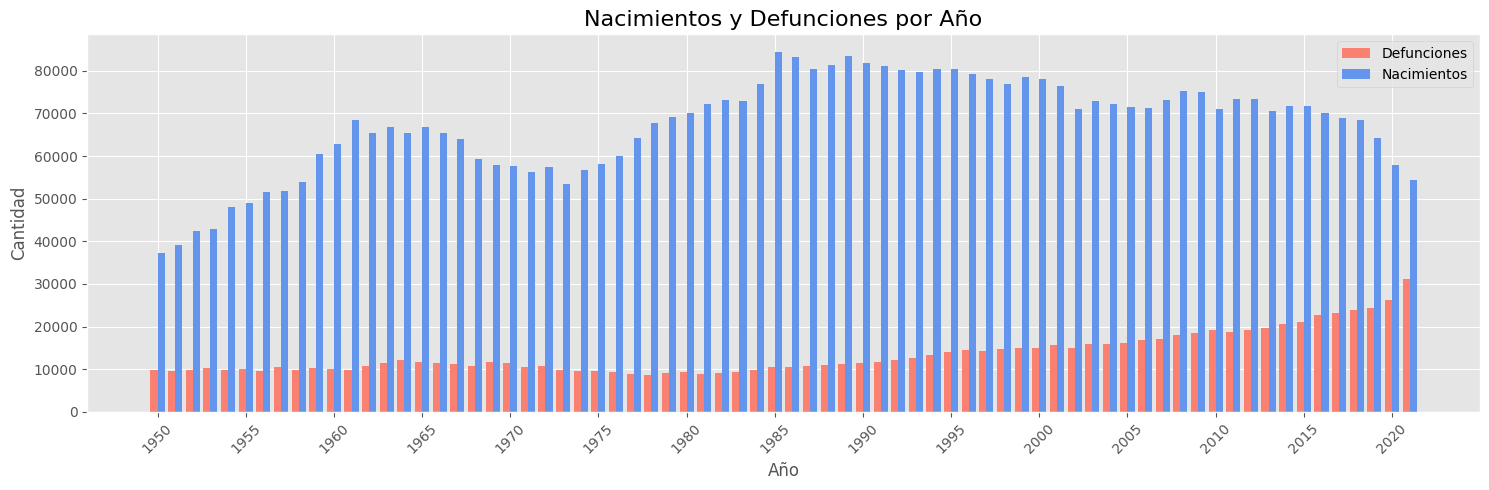

In [62]:
# Crear gráfico de barras
import numpy as np

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 5) # Define el tamaño por defecto de las figuras: 8x4 pulgadas

fig, ax = plt.subplots()

#mapear barras de nacimientos y defunciones
indices = np.arange(len(df))
ancho = 0.4

# Gráfico de barras para Nacimientos y Defunciones
ax.bar(indices - ancho/2, df['Defunciones'], width=ancho, color='salmon', label='Defunciones')
ax.bar(indices + ancho/2, df['Nacimientos'], width=ancho, color='cornflowerblue', label='Nacimientos')

# Configuración de ejes y etiquetas
ax.set_xticks(indices[::5], df['Año'][::5], rotation=45)  # Mostrar cada 5 años para evitar saturación

ax.set_title('Nacimientos y Defunciones por Año', fontsize=16)
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.legend()
plt.tight_layout()
plt.show()  



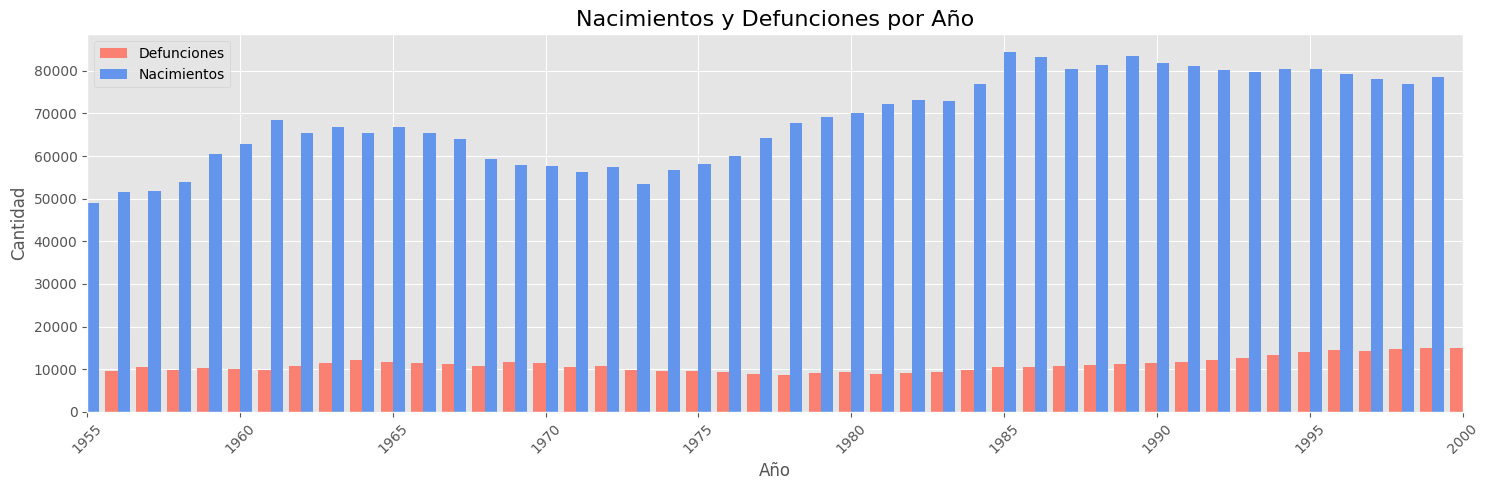

In [67]:
# Crear gráfico de barras
import numpy as np

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 5) # Define el tamaño por defecto de las figuras: 8x4 pulgadas

fig, ax = plt.subplots()

#mapear barras de nacimientos y defunciones
indices = np.arange(len(df))
ancho = 0.4

# Gráfico de barras para Nacimientos y Defunciones
ax.bar(indices - ancho/2, df['Defunciones'], width=ancho, color='salmon', label='Defunciones')
ax.bar(indices + ancho/2, df['Nacimientos'], width=ancho, color='cornflowerblue', label='Nacimientos')

# Configuración de ejes y etiquetas
ax.set_xticks(indices[::5], df['Año'][::5], rotation=45)  # Mostrar cada 5 años para evitar saturación

ax.set_title('Nacimientos y Defunciones por Año', fontsize=16)
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.legend()

#Linmites en y X

ax.set_xlim(5, 50)  # Limites en x


plt.tight_layout()
plt.show()  

C:\Users\ajmen\AppData\Local\Temp\ipykernel_36616\1162045934.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax.bar(['Nacimientos', 'Defunciones'],[int(ultimo_anio['Nacimientos']), int(ultimo_anio['Defunciones'])], color=['seagreen', 'salmon'])
C:\Users\ajmen\AppData\Local\Temp\ipykernel_36616\1162045934.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


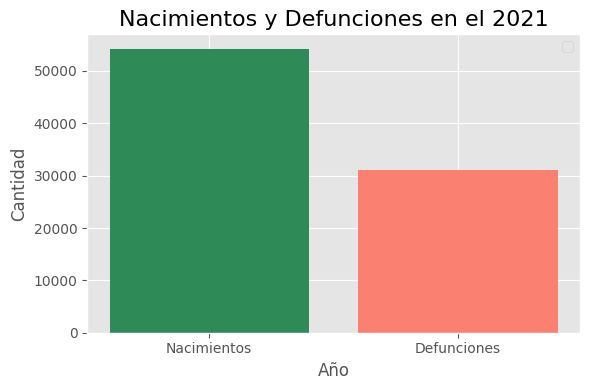

In [73]:
# Filtrar datos del último año
filtro = df['Año'] == df['Año'].max()


ultimo_anio = df[filtro]


# Crear gráfico de barras

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (6, 4) # Define el tamaño por defecto de las figuras: 8x4 pulgadas

fig, ax = plt.subplots()

ax.bar(['Nacimientos', 'Defunciones'],[int(ultimo_anio['Nacimientos']), int(ultimo_anio['Defunciones'])], color=['seagreen', 'salmon'])

ax.set_title(f'Nacimientos y Defunciones en el {ultimo_anio["Año"].values[0]}', fontsize=16)
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.legend()
plt.tight_layout()
plt.show()

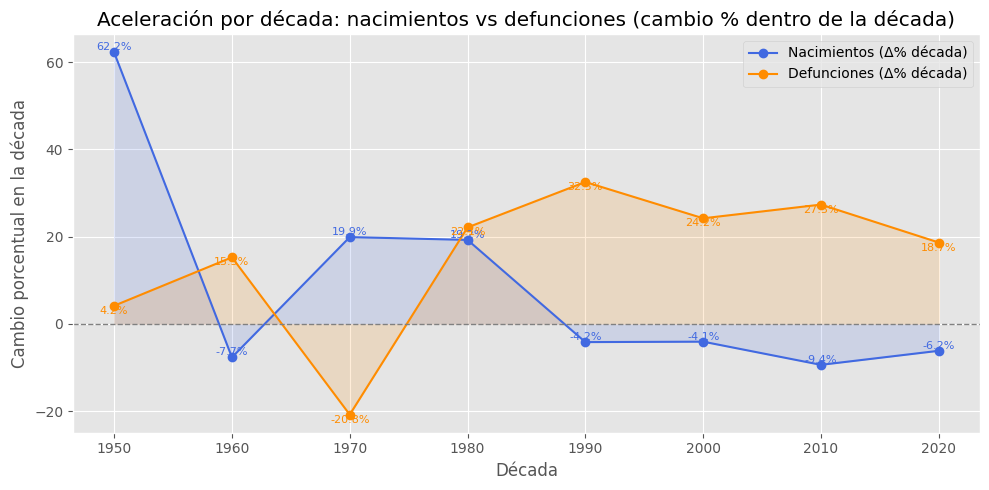

In [74]:
# Preparamos datos por década
df_decada = df.copy()
df_decada["Década"] = (df_decada["Año"] // 10) * 10

# Resumen por década: promedio, primer valor y último valor de la década
resumen_decada = (
    df_decada
    .groupby("Década")[["Nacimientos", "Defunciones"]]
    .agg(["mean", "first", "last"])
)

# Cambio porcentual por década (primer año vs último año de la década)
for columna in ["Nacimientos", "Defunciones"]:
    resumen_decada[(columna, "cambio_pct")] = (
        (resumen_decada[(columna, "last")] - resumen_decada[(columna, "first")])
        / resumen_decada[(columna, "first")]
        * 100
    )

# Extraemos datos para el gráfico
decadas = resumen_decada.index.astype(int)
nac_cambio_pct = resumen_decada[("Nacimientos", "cambio_pct")]
def_cambio_pct = resumen_decada[("Defunciones", "cambio_pct")]

# Gráfico de aceleración por década
plt.figure(figsize=(10, 5))

plt.plot(
    decadas,
    nac_cambio_pct,
    marker="o",
    color="royalblue",
    label="Nacimientos (Δ% década)"
)

plt.plot(
    decadas,
    def_cambio_pct,
    marker="o",
    color="darkorange",
    label="Defunciones (Δ% década)"
)

# Relleno para resaltar zonas positivas/negativas
plt.fill_between(decadas, nac_cambio_pct, 0, color="royalblue", alpha=0.15)
plt.fill_between(decadas, def_cambio_pct, 0, color="darkorange", alpha=0.15)

# Etiquetas de porcentaje en cada punto
for x, y in zip(decadas, nac_cambio_pct):
    plt.text(x, y, f"{y:.1f}%", ha="center", va="bottom", fontsize=8, color="royalblue")

for x, y in zip(decadas, def_cambio_pct):
    plt.text(x, y, f"{y:.1f}%", ha="center", va="top", fontsize=8, color="darkorange")

# Línea horizontal en 0 para separar aumento/disminución
plt.axhline(0, color="gray", ls="--", lw=1)

plt.title("Aceleración por década: nacimientos vs defunciones (cambio % dentro de la década)")
plt.xlabel("Década")
plt.ylabel("Cambio porcentual en la década")
plt.legend()
plt.tight_layout()
plt.show()


### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [33]:
#


2. **Calcular promedios:**

In [34]:
#

3. **Graficar:**

In [ ]:
#


NameError: name 'df_desde_2000' is not defined

<Figure size 1000x500 with 0 Axes>